In [1]:
import pandas as pd
import gzip
import json
import numpy as np
import re

pd.set_option('display.max_colwidth', -1)

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [2]:
file_path = "reviews_Cell_Phones_and_Accessories_5.json.gz"

In [3]:
phone_df = pd.read_json(file_path, lines = True)
phone_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :),5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]","Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one.",4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [4]:
len(phone_df)

194439

In [5]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [6]:
ratings_count_props = phone_df['overall'].value_counts(normalize = True)
ratings_count_props

5    0.558859
4    0.205684
3    0.110261
1    0.068294
2    0.056902
Name: overall, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


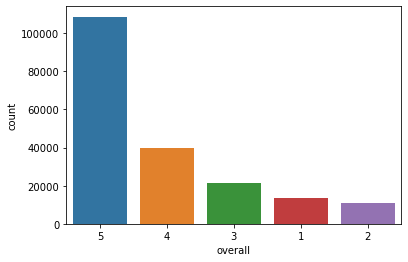

In [8]:
sns.countplot(phone_df['overall'], order=phone_df['overall'].value_counts(ascending=False).index)
plt.show()

In [9]:
reviewer_count = phone_df['reviewerName'].value_counts(ascending=False)
reviewer_count.head(10)

Amazon Customer                3562
Pen Name                       344 
John                           268 
Chris                          234 
Mike                           224 
David                          218 
Ryan                           177 
Michael                        177 
Mike Tarrani "Jazz Drummer"    152 
Scott                          145 
Name: reviewerName, dtype: int64

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf # (I'm using tensorflow 2.0)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization



from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [93]:
tf.__version__

'2.1.0'

In [11]:
# Extract columns of interest into a new dataframe
data_df = phone_df[['overall', 'reviewText']]
data_df.head()

,overall,reviewText
0,4,They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again
1,5,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)
2,5,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!
3,4,"Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one."
4,5,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key."


In [12]:
"""
from sklearn.preprocessing import LabelEncoder
y1 = data_df['overall']
label_encoder = LabelEncoder()
label_encoder.fit(y1)
encoded_y = label_encoder.transform(y1)
encoded_y
"""


"\nfrom sklearn.preprocessing import LabelEncoder\ny1 = data_df['overall']\nlabel_encoder = LabelEncoder()\nlabel_encoder.fit(y1)\nencoded_y = label_encoder.transform(y1)\nencoded_y\n"

In [13]:
# data_df['new_overall'] = [x for x in encoded_y]

In [14]:
data_df.head()

,overall,reviewText
0,4,They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again
1,5,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)
2,5,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!
3,4,"Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one."
4,5,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key."


In [15]:
df_renamed = data_df.rename(columns = {'overall': 'label', 'reviewText': 'text'})

In [16]:
y = df_renamed['label']

In [17]:


# Step 1: Label-encode data set
"""

"""


'\n\n'

In [18]:


# Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)

In [19]:
# Include array in dataframe
# df_renamed['class_labels'] = [x for x in one_hot_y]


In [20]:
df_renamed.head()

,label,text
0,4,They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again
1,5,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)
2,5,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!
3,4,"Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one."
4,5,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key."


In [50]:
model_msk = np.random.rand(len(df_renamed)) < 0.25
model_data = df_renamed[model_msk]

In [51]:
# Split data into train and test
msk = np.random.rand(len(model_data)) < 0.8
train_main = model_data[msk]
test_main = model_data[~msk]

In [56]:
# split train into train and validation
msk_val = np.random.rand(len(train_main)) < 0.8
train = train_main[msk_val]
val = train_main[~msk_val]

In [57]:
len(test_main), len(train), len(val)

(9693, 31015, 7619)

In [24]:
# Create Tensor Flow datasets

In [58]:
# train dataset
target = train.pop('label')
train_ds = tf.data.Dataset.from_tensor_slices((train.values, target.values))

In [59]:
# validation dataset
target = val.pop('label')
val_ds = tf.data.Dataset.from_tensor_slices((val.values, target.values))

In [60]:
# test dataset
target = test_main.pop('label')
test_ds = tf.data.Dataset.from_tensor_slices((test_main.values, target.values))

In [28]:

# target = df_renamed.pop('label')
# dataset = tf.data.Dataset.from_tensor_slices((df_renamed.values, target.values))

In [61]:
# inspect any dataset
for feat, targ in val_ds.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [b'awesome! stays on, and looks great. can be used on multiple apple products.  especially having nails, it helps to have an elevated key.'], Target: 5
Features: [b'This charger works great and is short, unlike most chargers. It does a great job with charging both my phone and my GPS when I am in the car.  Great value and easy on the wallet.'], Target: 5
Features: [b"Received this in about a weeks time. Very nice actually considering how cheap the price was. It's a pink/purple with black leopard spots and has a very nice feel to it. I haven't tried to remove it yet, but hopefully it won't give me any trouble when I do want to change covers."], Target: 5
Features: [b'works good with our phones, better actually than the charger that came with one of the phones initially , great price'], Target: 4
Features: [b'I was surprised it game in three steps, but when i put the case together and slid my phone in, i loved it. It is hard to get off'], Target: 5


In [92]:
for i, label in enumerate(train_ds.class_names):
    print("Label", i, "corresponds to", label)

AttributeError: 'TensorSliceDataset' object has no attribute 'class_names'

In [30]:
# Text Preprocessing
# standardize, tokenize, and vectorize the data using the preprocessing.TextVectorization

In [62]:
VOCAB_SIZE = 10000

binary_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='binary')

In [63]:
MAX_SEQUENCE_LENGTH = 250

int_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH)

In [64]:
# Make a text-only dataset (without labels), then call adapt
train_text = train_ds.map(lambda text, labels: text)
binary_vectorize_layer.adapt(train_text)
int_vectorize_layer.adapt(train_text)

In [65]:
def binary_vectorize_text(text, label):
    
      text = tf.expand_dims(text, -1)
    
      return binary_vectorize_layer(text), label

In [66]:
def int_vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return int_vectorize_layer(text), label

In [67]:
# Retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(train_ds))
review, star_rating = text_batch, label_batch
print("Review", review)
print("Rating", star_rating)

Review tf.Tensor([b"Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one."], shape=(1,), dtype=string)
Rating tf.Tensor(4, shape=(), dtype=int64)


In [68]:
print("'binary' vectorized review:", 
      binary_vectorize_text(review, star_rating))

'binary' vectorized review: (<tf.Tensor: shape=(1, 10000), dtype=int64, numpy=array([[0, 0, 1, ..., 0, 0, 0]], dtype=int64)>, <tf.Tensor: shape=(), dtype=int64, numpy=4>)


In [69]:
print("'int' vectorized review:",
      int_vectorize_text(review, star_rating))

'int' vectorized review: (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[ 246,  458,   15,   35,   69,    4,   23,   15,  159, 1443,  193,
           3,  292,   70,  213,   75,   46,  168,    6,   35,  368,    4,
         397,    6,  378,   40,  108,    3,  212,  274,   27,  195,   26,
          22,    6,  248,  368,    5, 2720,  132,   82,    7,   55,    5,
         169,   46, 1817,    5,  189,   16,   27,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [70]:
print("1817 ---> ", int_vectorize_layer.get_vocabulary()[1886])
print("248 ---> ", int_vectorize_layer.get_vocabulary()[1753])
print("Vocabulary size: {}".format(len(int_vectorize_layer.get_vocabulary())))

1817 --->  b'proper'
248 --->  b'increase'
Vocabulary size: 9999


In [40]:
# Apply TextVectorization layers on train, test and validation datasets

In [71]:
binary_train_ds = train_ds.map(binary_vectorize_text)
binary_val_ds = val_ds.map(binary_vectorize_text)
binary_test_ds = test_ds.map(binary_vectorize_text)

int_train_ds = train_ds.map(int_vectorize_text)
int_val_ds = val_ds.map(int_vectorize_text)
int_test_ds = test_ds.map(int_vectorize_text)

In [72]:
import time
# Configure the dataset for performance

#AUTOTUNE = tf.data.AUTOTUNE

def configure_dataset(dataset):
    
      return dataset.cache()

In [73]:
binary_train_ds = configure_dataset(binary_train_ds)
binary_val_ds = configure_dataset(binary_val_ds)
binary_test_ds = configure_dataset(binary_test_ds)

int_train_ds = configure_dataset(int_train_ds)
int_val_ds = configure_dataset(int_val_ds)
int_test_ds = configure_dataset(int_test_ds)

In [44]:
# Train the Model

In [75]:
binary_model = tf.keras.Sequential([layers.Dense(6)])
binary_model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.SUM),
    optimizer='adam', metrics = ['accuracy'])
history = binary_model.fit(
    binary_train_ds, validation_data=binary_val_ds, epochs=10)

Train for 31015 steps, validate for 7619 steps
Epoch 1/10
31015/31015 [==============================] - 104s 3ms/step - loss: 1.0298 - accuracy: 0.6088 - val_loss: 1.0365 - val_accuracy: 0.6333
Epoch 2/10
31015/31015 [==============================] - 133s 4ms/step - loss: 0.8507 - accuracy: 0.6732 - val_loss: 1.1090 - val_accuracy: 0.6404
Epoch 3/10
31015/31015 [==============================] - 135s 4ms/step - loss: 0.7876 - accuracy: 0.6984 - val_loss: 1.1811 - val_accuracy: 0.6359
Epoch 4/10
31015/31015 [==============================] - 126s 4ms/step - loss: 0.7490 - accuracy: 0.7166 - val_loss: 1.2568 - val_accuracy: 0.6320
Epoch 5/10
31015/31015 [==============================] - 126s 4ms/step - loss: 0.7228 - accuracy: 0.7280 - val_loss: 1.3319 - val_accuracy: 0.6261
Epoch 6/10
31015/31015 [==============================] - 130s 4ms/step - loss: 0.7009 - accuracy: 0.7391 - val_loss: 1.3994 - val_accuracy: 0.6242
Epoch 7/10
31015/31015 [==============================] - 134s 4m

In [76]:
def create_model(vocab_size, num_labels):
       
    model = tf.keras.Sequential([
      layers.Embedding(vocab_size, 64, mask_zero=True),
      layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2),
      layers.GlobalMaxPooling1D(),
      layers.Dense(num_labels)])
        
    return model

In [79]:
# vocab_size is VOCAB_SIZE + 1 since 0 is used additionally for padding.
int_model = create_model(vocab_size=VOCAB_SIZE + 1, num_labels=6)
int_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])
history = int_model.fit(int_train_ds, validation_data=int_val_ds, epochs=5)

Train for 31015 steps, validate for 7619 steps
Epoch 1/5
31015/31015 [==============================] - 428s 14ms/step - loss: 1.0014 - accuracy: 0.6041 - val_loss: 1.0018 - val_accuracy: 0.6228
Epoch 2/5
31015/31015 [==============================] - 434s 14ms/step - loss: 0.8521 - accuracy: 0.6631 - val_loss: 1.0383 - val_accuracy: 0.6304
Epoch 3/5
31015/31015 [==============================] - 438s 14ms/step - loss: 0.6962 - accuracy: 0.7299 - val_loss: 1.2033 - val_accuracy: 0.6328
Epoch 4/5
31015/31015 [==============================] - 439s 14ms/step - loss: 0.5214 - accuracy: 0.8053 - val_loss: 1.4309 - val_accuracy: 0.6300
Epoch 5/5
31015/31015 [==============================] - 438s 14ms/step - loss: 0.3701 - accuracy: 0.8670 - val_loss: 1.9512 - val_accuracy: 0.6131


In [80]:
print("Linear model on binary vectorized data:")
print(binary_model.summary())

Linear model on binary vectorized data:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  60006     
Total params: 60,006
Trainable params: 60,006
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
print("ConvNet model on int vectorized data:")
print(int_model.summary())

ConvNet model on int vectorized data:
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640064    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
Total params: 660,998
Trainable params: 660,998
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
binary_loss, binary_accuracy = binary_model.evaluate(binary_test_ds)
int_loss, int_accuracy = int_model.evaluate(int_test_ds)

print("Binary model accuracy: {:2.2%}".format(binary_accuracy))
print("Int model accuracy: {:2.2%}".format(int_accuracy))

9693/9693 [==============================] - 21s 2ms/step - loss: 2.0296 - accuracy: 0.6001
Binary model accuracy: 59.72%
Int model accuracy: 60.01%


In [ ]:
# Save the models

In [84]:
# Binar Model
export_model_binary = tf.keras.Sequential(
    [binary_vectorize_layer, binary_model,
     layers.Activation('sigmoid')])

export_model_binary.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=['accuracy'])



In [85]:
# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model_binary.evaluate(test_ds)
print("Accuracy: {:2.2%}".format(binary_accuracy))

9693/9693 [==============================] - 41s 4ms/step - loss: 1.3947 - accuracy: 0.5735
Accuracy: 59.72%


In [90]:
def get_string_labels(predicted_scores_batch):
    predicted_int_labels = tf.argmax(predicted_scores_batch, axis=1)
    predicted_labels = tf.gather(train_ds.class_names, predicted_int_labels)
    return predicted_labels   
      
     
    
      

In [91]:
inputs = [
    'These make using the home button easy. My daughter and I both like them.  I would purchase them again. Well worth the price.',  # python
    'it worked for the first week then it only charge my phone to 20%. it is a waste of money.',  # java
]
predicted_scores = export_model_binary.predict(inputs)
predicted_labels = get_string_labels(predicted_scores)
for input, label in zip(inputs, predicted_labels):
       
    print("Question: ", input)
    print("Predicted label: ", label.numpy())
        
       

AttributeError: 'TensorSliceDataset' object has no attribute 'class_names'

In [ ]:
# ConvNet model



In [ ]:
# PREFETCH



In [ ]:
# standardize, tokenize, and vectorize the data using the helpful preprocessing.TextVectorization layer.

In [ ]:
"""
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf # (I'm using tensorflow 2.0)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
# ... [code for importing and preparing the pandas dataframe omitted]

# TOKENIZE

train_text = training['text'].to_numpy()
tok = Tokenizer(oov_token='<unk>')
tok.fit_on_texts(train_text)
tok.word_index['<pad>'] = 0
tok.index_word[0] = '<pad>'

train_seqs = tok.texts_to_sequences(train_text)
train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

train_labels = training['label'].to_numpy().flatten()

valid_text = validation['text'].to_numpy()
valid_seqs = tok.texts_to_sequences(valid_text)
valid_seqs = tf.keras.preprocessing.sequence.pad_sequences(valid_seqs, padding='post')

valid_labels = validation['label'].to_numpy().flatten()

# CONVERT TO TF DATASETS

train_ds = tf.data.Dataset.from_tensor_slices((train_seqs,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_seqs,valid_labels))

train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
valid_ds = valid_ds.batch(BATCH_SIZE)

# PREFETCH

train_ds = train_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Model
model = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation='sigmoid') # also tried activation='softmax'
])

model.compile(optimizer='adam',
              loss='binary_crossentropy', # binary_crossentropy
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    epochs=1,
    validation_data=valid_ds, validation_steps=1, steps_per_epoch=BUFFER_SIZE)
    
model = keras.Sequential([
    layers.Embedding(vocab_size, embedding_dim),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation='sigmoid') # also tried activation='softmax'
])

x, y = training['text'].to_numpy(), training['label'].to_numpy()
x, y = tf.convert_to_tensor(x),tf.convert_to_tensor(y)
"""